# Section 2 - Panda(s) in training

<img src='images/quote2.PNG'>

- df.dropna
- df.fillna
nunique, unique, value_counts
- df.set_index('index').sort_index()
- df.loc['index']
- df.iloc['index']

In [3]:
import pandas as pd
%matplotlib inline
import seaborn as sns

In [4]:
t = pd.read_csv('data/train.csv')

In [5]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
### Plot the number of survivors for each of the Passenger class 

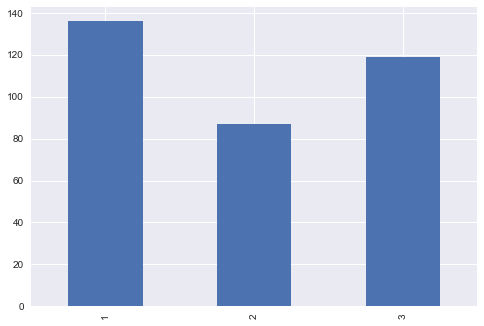

In [6]:
t.Pclass[t.Survived == 1].value_counts().sort_index().plot('bar')

### Which columns have missing values?

In [7]:
t.info()
# Anything that has fewer than 891 non-null entries (Age, Cabin, Embarked)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### The Cabin column seems to have several missing values. Delete it.

In [11]:
t.drop('Cabin', axis=1, inplace=True) #inplace=True means relabel this new df as t still!

ValueError: labels ['Cabin'] not contained in axis

### Where ages are not available, replace them with the average age.

In [12]:
t.Age.fillna(t.Age.mean(),inplace=True)

### Determine the most frequently embarked location and use this to fill in missing values

In [ ]:
t.Embarked.value_counts()

In [ ]:
t.Embarked.fillna('S',inplace=True)

In [ ]:
t.info()

### Show only the name, sex and age of all the teenagers

In [ ]:
t[(t.Age <=19) & (t.Age >= 13)][['Name','Sex','Age']]

### Show the name, age and class of travel of all women who travelled above the age of 50.

In [ ]:
t[(t.Sex == 'female') & (t.Age > 50)][['Name', 'Age','Pclass']]

### Plot a bar chart showing the number of women who survived (vs. those who did not) travelling in first class

In [ ]:
t.Survived[(t.Sex == 'female') & (t.Pclass == 1)].value_counts().plot(kind='bar', color='pink',)

### Create a bar chart showing the number of men who survived (vs. those who did not) travelling in 3rd class

In [ ]:
t.Survived[(t.Sex == 'male') & (t.Pclass == 3)].value_counts().plot(kind='bar', color='lightblue')